In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
wine_data = pd.read_csv('WineQT.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
x = wine_data[features]
y = wine_data['quality']

In [4]:
wine_data.shape

(1143, 13)

In [5]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


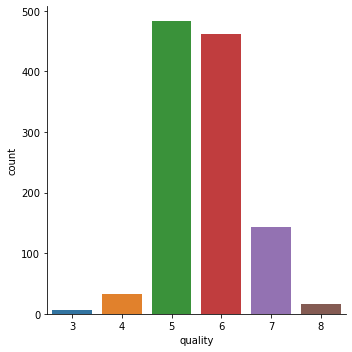

In [7]:
sns.catplot(x='quality',data=wine_data,kind='count')

In [8]:
plot=plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

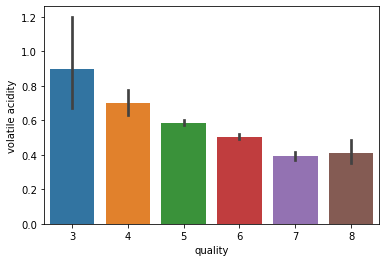

In [9]:
sns.barplot(x='quality',y='volatile acidity',data=wine_data)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

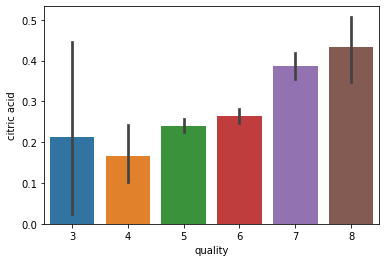

In [10]:
sns.barplot(x='quality',y='citric acid',data=wine_data)

In [11]:
correlation=wine_data.corr()

<AxesSubplot:>

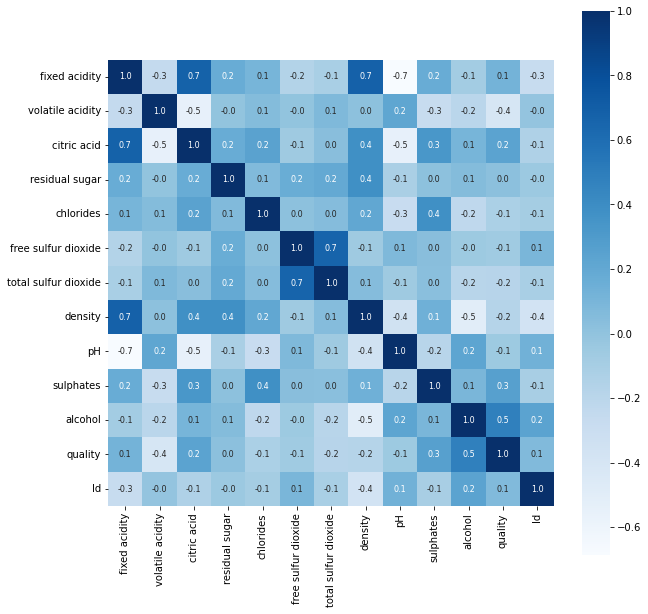

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [13]:
Y=wine_data['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [14]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2,random_state=2)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, Y_train)
#RandomForestClassifier(...)

RandomForestClassifier(max_depth=2, random_state=0)

In [25]:
from sklearn.metrics import accuracy_score
X_test_prediction=clf.predict(X_test)
test_data_acc = accuracy_score(X_test_prediction,Y_test)

In [26]:
print('Accuracy : ',test_data_acc)

Accuracy :  0.8646288209606987
